In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/cleaned_data.csv")

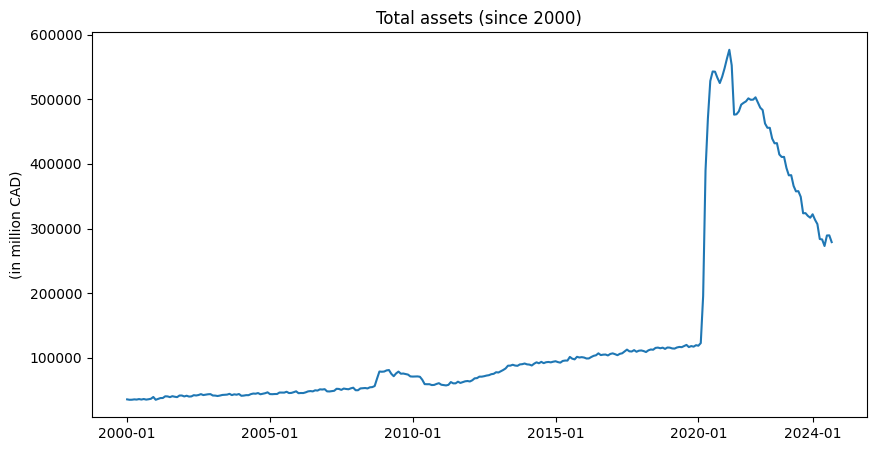

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data[(data["Assets and liabilities"] == "Total assets")],
    x="REF_DATE",
    y="VALUE",
)
plt.xticks(['2000-01', '2005-01', '2010-01', '2015-01', '2020-01', '2024-01'])
plt.xlabel("")
plt.ylabel("(in million CAD)")
plt.title("Total assets (since 2000)")
plt.show()

## Pre-COVID-19 (Before 2020)

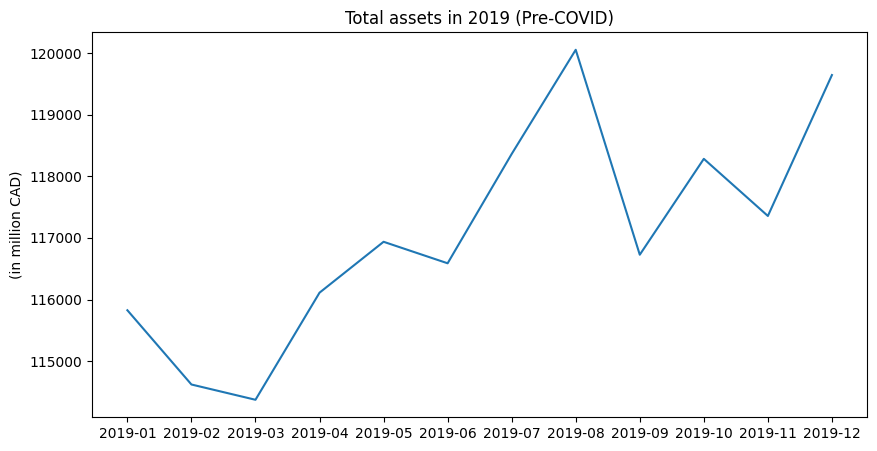

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data[(data["Assets and liabilities"] == "Total assets") & (data["REF_DATE"] >= '2019-01') & (data["REF_DATE"] <= '2019-12')],
    x="REF_DATE",
    y="VALUE",
)
plt.xlabel("")
plt.ylabel("(in million CAD)")
plt.title("Total assets in 2019 (Pre-COVID)")
plt.show()

In [34]:
print(
    "Total Assets at the end of 2019 = CAD",
    data[
        (data["Assets and liabilities"] == "Total assets")
        & (data["REF_DATE"] == "2019-12")
    ]["VALUE"].values[0],
    "(in millions)"
)

Total Assets at the end of 2019 = CAD 119643.0 (in millions)


In [35]:
print(
    "Total Liabilities at the end of 2019 = CAD",
    data[
        (data["Assets and liabilities"] == "Total liabilities")
        & (data["REF_DATE"] == "2019-12")
    ]["VALUE"].values[0],
    "(in millions)"
)

Total Liabilities at the end of 2019 = CAD 119643.0 (in millions)


In [31]:
print(
    "Net Financial Position at the end of 2019 = CAD",
    data[
        (data["Assets and liabilities"] == "Total assets")
        & (data["REF_DATE"] == "2019-12")
    ]["VALUE"].values[0]
    - data[
        (data["Assets and liabilities"] == "Total liabilities")
        & (data["REF_DATE"] == "2019-12")
    ]["VALUE"].values[0],
)

Net Financial Position at the end of 2019 = CAD 0.0


## During COVID-19

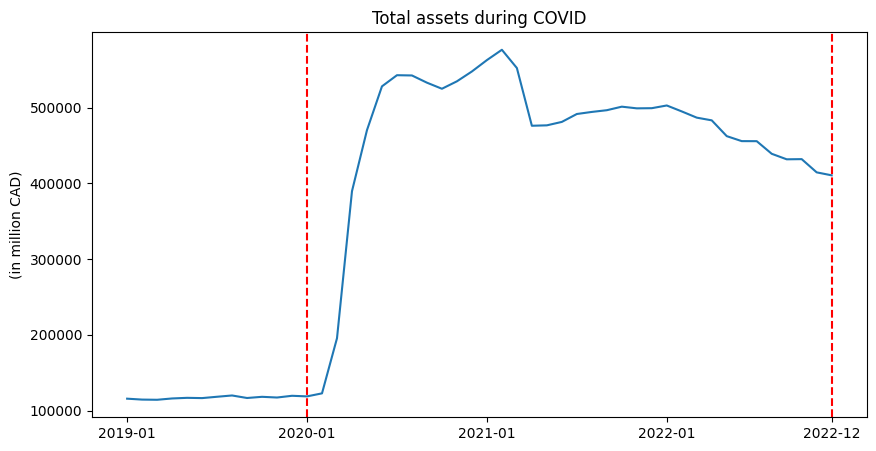

In [45]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data[
        (data["Assets and liabilities"] == "Total assets")
        & (data["REF_DATE"] >= "2019-01")
        & (data["REF_DATE"] <= "2022-12")
    ],
    x="REF_DATE",
    y="VALUE",
)
plt.axvline(x="2020-01", linestyle='--',color='red')
plt.axvline(x="2022-12", linestyle='--',color='red')
plt.xticks(["2019-01", "2020-01", "2021-01", "2022-01", "2022-12"])
plt.xlabel("")
plt.ylabel("(in million CAD)")
plt.title("Total assets during COVID")
plt.show()

In [69]:
assets_end_2019 = data[
    (data["Assets and liabilities"] == "Total assets") & (data["REF_DATE"] == "2019-12")
]["VALUE"].values[0]
assets_end_2020 = data[
    (data["Assets and liabilities"] == "Total assets") & (data["REF_DATE"] == "2020-12")
]["VALUE"].values[0]

In [70]:
print(
    "Percentage increase in liabilities in 2020 was",
    round(
        ((assets_end_2020 - assets_end_2019) / assets_end_2019) * 100, 2
    ),
    "%",
)

Percentage increase in liabilities in 2020 was 357.89 %


There was a more than 350% increase in assets of the Bank of Canada by the end of 2020 compared to 2019.

- The Bank of Canada engaged in large-scale asset purchases during the pandemic. This means the Bank bought government bonds, mortgage-backed securities, and other financial assets to inject liquidity into the financial system.
- By purchasing these assets, the Bank of Canada increased the size of its balance sheet on the asset side. These bond purchases aimed to lower interest rates, encourage borrowing and investment, and stabilize the economy.
- On the liability side, when the Bank purchased these assets, it created more reserves in the banking system, increasing liabilities (primarily deposits by commercial banks).

Support for Government Spending:

- The government introduced large fiscal stimulus programs (such as wage subsidies and emergency benefits) to support individuals and businesses. To fund this, the government issued more bonds, which the Bank of Canada helped absorb through asset purchases.
- The purchase of government bonds increased the assets of the Bank of Canada, while the deposits created from these purchases (held by commercial banks) led to an increase in liabilities.

In [59]:
print("Liabilities at the end of each year since 2019: \n", data[
    (data["Assets and liabilities"] == "Total liabilities")
    & (
        (data["REF_DATE"] == "2019-12")
        | (data["REF_DATE"] == "2020-12")
        | (data["REF_DATE"] == "2021-12")
        | (data["REF_DATE"] == "2022-12")
        | (data["REF_DATE"] == "2023-12")
        | (data["REF_DATE"] == "2024-09")
    )
][["REF_DATE", "VALUE"]])

Liabilities at the end of each year since 2019: 
       REF_DATE     VALUE
7361   2019-12  119643.0
7918   2020-12  547833.0
8494   2021-12  499365.0
9070   2022-12  410710.0
9646   2023-12  316776.0
10078  2024-09  279037.0


In [10]:
data[
    (data["Assets and liabilities"] == "Total assets")
    & (data["REF_DATE"] >= "2020-01")
    & (data["REF_DATE"] <= "2020-12")
]

,REF_DATE,Assets and liabilities,VALUE
7378,2020-01,Total assets,118851.0
7420,2020-02,Total assets,122856.0
7462,2020-03,Total assets,195631.0
7504,2020-04,Total assets,389767.0
7552,2020-05,Total assets,470381.0
7600,2020-06,Total assets,528197.0
7648,2020-07,Total assets,542905.0
7696,2020-08,Total assets,542571.0
7744,2020-09,Total assets,533041.0
7792,2020-10,Total assets,525021.0


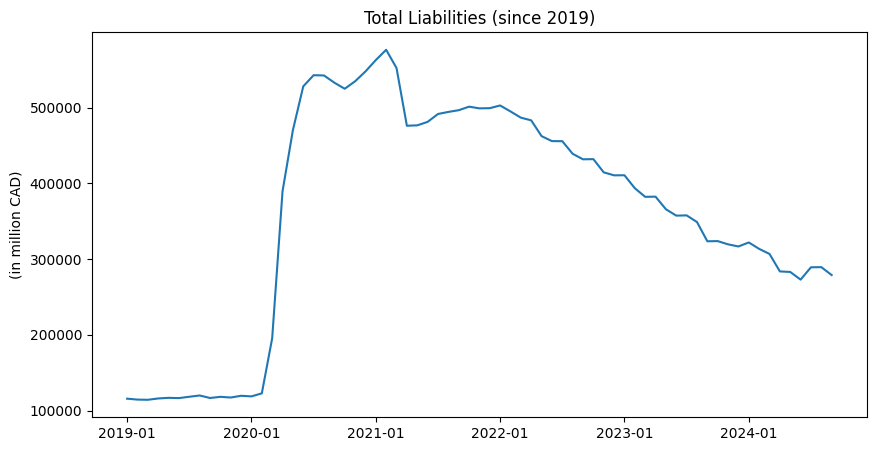

In [28]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data[
        (data["Assets and liabilities"] == "Total liabilities")
        & (data["REF_DATE"] >= "2019-01")
    ],
    x="REF_DATE",
    y="VALUE",
)
plt.xticks(["2019-01", "2020-01", "2021-01", "2022-01", "2023-01", "2024-01"])
plt.xlabel("")
plt.ylabel("(in million CAD)")
plt.title("Total Liabilities (since 2019)")
plt.show()

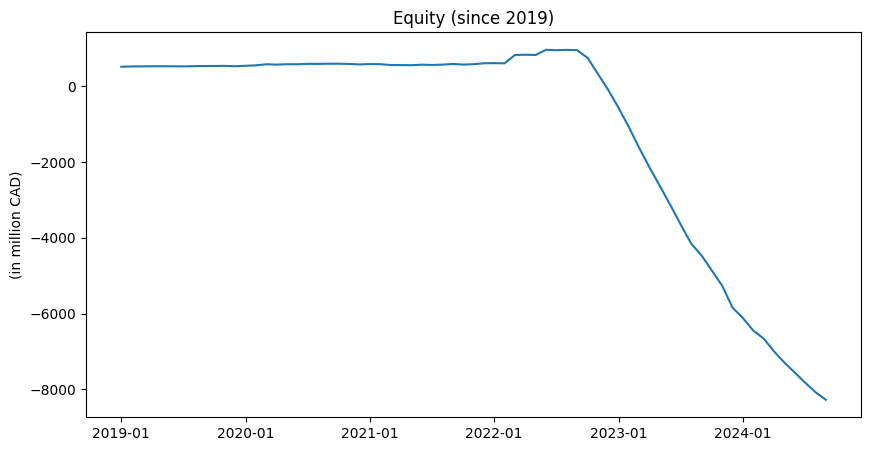

In [29]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data[
        (data["Assets and liabilities"] == "Equity") & (data["REF_DATE"] >= "2019-01")
    ],
    x="REF_DATE",
    y="VALUE",
)
plt.xticks(["2019-01", "2020-01", "2021-01", "2022-01", "2023-01", "2024-01"])
plt.xlabel("")
plt.ylabel("(in million CAD)")
plt.title("Equity (since 2019)")
plt.show()

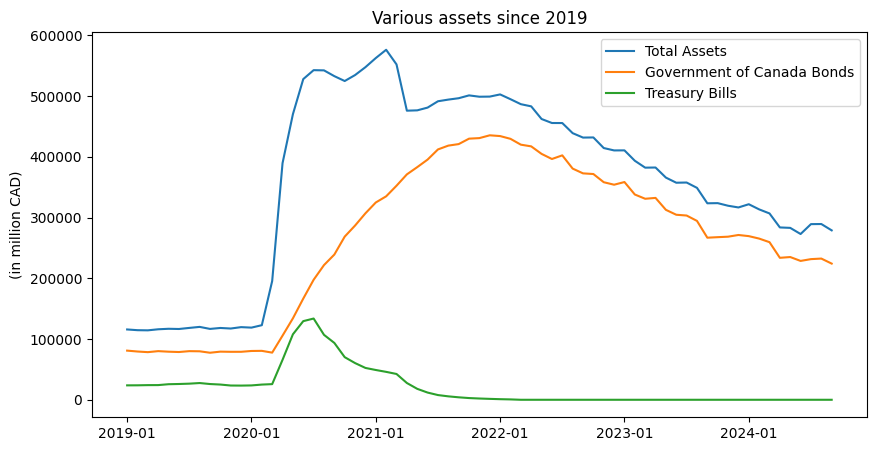

In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data[
        (data["Assets and liabilities"] == "Total assets")
        & (data["REF_DATE"] >= "2019-01")
        # & (data["REF_DATE"] <= "2022-12")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Total Assets",
)
sns.lineplot(
    data=data[
        (data["Assets and liabilities"] == "Total, Government of Canada, bonds")
        & (data["REF_DATE"] >= "2019-01")
        # & (data["REF_DATE"] <= "2022-12")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Government of Canada Bonds",
)
sns.lineplot(
    data=data[
        (data["Assets and liabilities"] == "Government of Canada, Treasury Bills")
        & (data["REF_DATE"] >= "2019-01")
        # & (data["REF_DATE"] <= "2022-12")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Treasury Bills",
)
plt.xticks(["2019-01", "2020-01", "2021-01", "2022-01", "2023-01", "2024-01"])
plt.xlabel("")
plt.legend(loc="upper right")
plt.ylabel("(in million CAD)")
plt.title("Various assets since 2019")
plt.show()

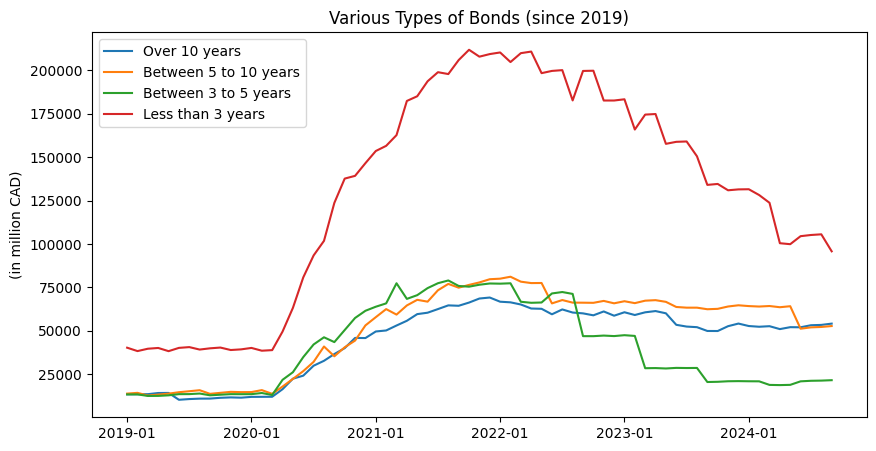

In [31]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data[
        (data["Assets and liabilities"] == "Government of Canada, bonds, over 10 years")
        & (data["REF_DATE"] >= "2019-01")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Over 10 years",
)
sns.lineplot(
    data=data[
        (
            data["Assets and liabilities"]
            == "Government of Canada, bonds, 5 years to 10 years"
        )
        & (data["REF_DATE"] >= "2019-01")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Between 5 to 10 years",
)
sns.lineplot(
    data=data[
        (
            data["Assets and liabilities"]
            == "Government of Canada, bonds, over 3 years to 5 years"
        )
        & (data["REF_DATE"] >= "2019-01")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Between 3 to 5 years",
)
sns.lineplot(
    data=data[
        (
            data["Assets and liabilities"]
            == "Government of Canada, bonds, 3 years and under"
        )
        & (data["REF_DATE"] >= "2019-01")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Less than 3 years",
)
plt.xticks(["2019-01", "2020-01", "2021-01", "2022-01", "2023-01", "2024-01"])
plt.xlabel("")
plt.ylabel("(in million CAD)")
plt.title("Various Types of Bonds (since 2019)")
plt.legend(loc="upper left")
plt.show()

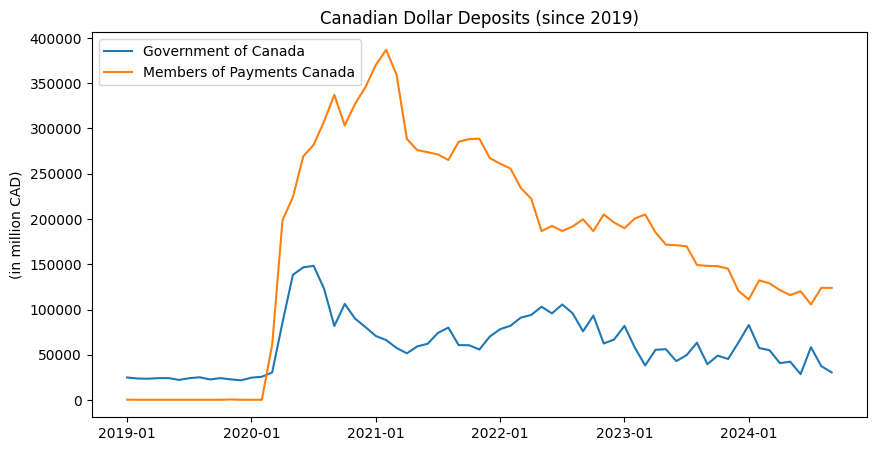

In [27]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data[
        (
            data["Assets and liabilities"]
            == "Canadian dollar deposits, Government of Canada"
        )
        & (data["REF_DATE"] >= "2019-01")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Government of Canada",
)
sns.lineplot(
    data=data[
        (
            data["Assets and liabilities"]
            == "Canadian dollar deposits, members of Payments Canada"
        )
        & (data["REF_DATE"] >= "2019-01")
    ],
    x="REF_DATE",
    y="VALUE",
    label="Members of Payments Canada",
)
plt.xticks(["2019-01", "2020-01", "2021-01", "2022-01", "2023-01", "2024-01"])
plt.xlabel("")
plt.ylabel("(in million CAD)")
plt.title("Canadian Dollar Deposits (since 2019)")
plt.legend(loc="upper left")
plt.show()